In [35]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/student_scores.csv', names=None)
df.head(4)

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [37]:
X = np.array(df['hours']).reshape(-1,1)
y = np.array(df['scores'])

LinReg = LinearRegression()
LinReg.fit(X, y)

LinearRegression()

In [38]:
np.random.seed(0)
X_new = np.random.randint(3,10, (len(y),1))
# print(X_new)

y_pred = LinReg.predict(X_new)
y_pred

array([70.91429714, 80.69010053, 31.81108358, 61.13849375, 61.13849375,
       61.13849375, 41.58688697, 61.13849375, 80.69010053, 51.36269036,
       70.91429714, 90.46590392, 31.81108358, 31.81108358, 70.91429714,
       51.36269036, 41.58688697, 90.46590392, 90.46590392, 31.81108358,
       41.58688697, 80.69010053, 41.58688697, 80.69010053, 31.81108358])

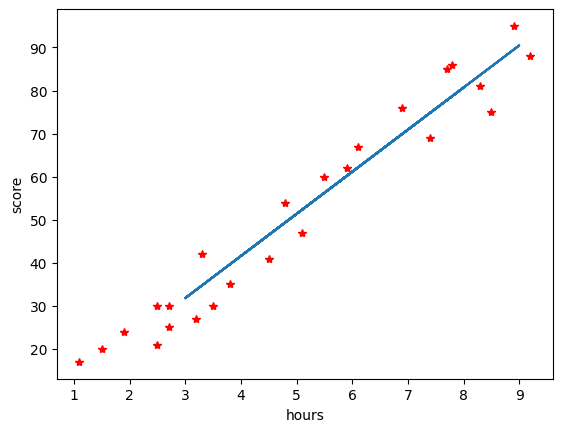

In [39]:
plt.plot(X_new, y_pred)
plt.xlabel('hours')
plt.ylabel('score')

plt.plot(X, y, 'r*')

plt.show()

In [40]:
print("Coefficient of determination/ Level of confidance:", round(LinReg.score(X, y),2))

Coefficient of determination/ Level of confidance: 0.95


In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 26.02838882702592
Mean Squared Error: 1027.8519125959187
Root Mean Squared Error: 32.0601296409718


actual task of lesson 36 - 1 task

In [42]:
# KFold because it is the sempliest way to make CV - model ok
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(LinReg, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
# print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.78626426 0.97891923 0.93182467 0.96604831 0.9273292 ]
Average CV Score:  0.9180771341891051


Task 2

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [45]:
# devide data into 2 selections train and test (20%)
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
# model train
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression()

In [47]:
# forecast
y_pred = LinReg.predict(X_test)

actual task of lesson 36 - 2 task

In [48]:
# KFold because it is the sempliest way to make CV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

k_folds = KFold(n_splits = 10)

# different metrix 
mae_scores = cross_val_score(LinReg, X, y, cv=k_folds, scoring=make_scorer(mean_absolute_error))
mse_scores = cross_val_score(LinReg, X, y, cv=k_folds, scoring=make_scorer(mean_squared_error))
r2_scores = cross_val_score(LinReg, X, y, cv=k_folds, scoring=make_scorer(r2_score))
scores = cross_val_score(LinReg, X, y, cv = k_folds)


# results from different metrix(Average CV Score=R2) - model is not good
print("Mean Absolute Error:", mae_scores.mean())
print("Mean Squared Error:", mse_scores.mean())
print("R^2 Score:", r2_scores.mean())
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())


Mean Absolute Error: 53.81458833722851
Mean Squared Error: 4764.581585340073
R^2 Score: -0.1814921707362745
Cross Validation Scores:  [-0.7051358   0.58928565 -1.4021183   0.31869829  0.22364329 -0.88558988
 -0.07460045  0.02556901 -0.64406816  0.73939464]
Average CV Score:  -0.1814921707362745
